<a href="https://colab.research.google.com/github/Anshad-Aziz/Student_index_performance-/blob/main/Student_Performanc_with_Multible_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
df=pd.read_csv('Student_Performance.csv')

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.tail(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9990,9,43,No,7,4,40.0
9991,5,97,Yes,7,4,83.0
9992,9,52,No,9,7,50.0
9993,9,58,Yes,7,7,55.0
9994,6,46,Yes,8,0,39.0
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


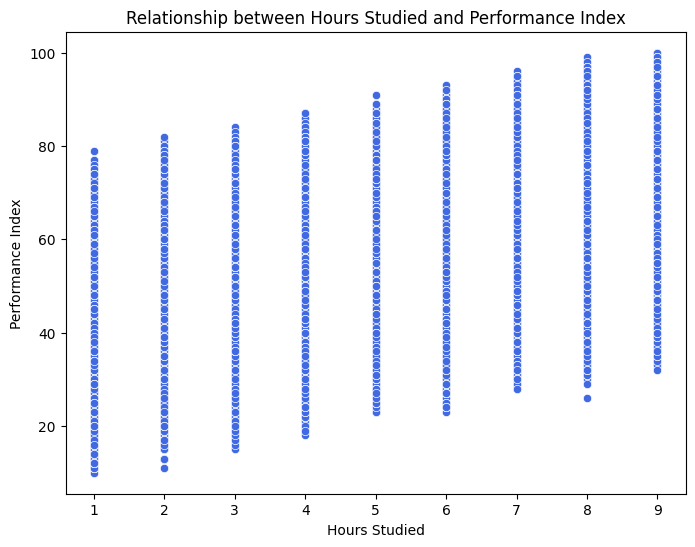

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Hours Studied',y='Performance Index',data=df,color='royalblue')
plt.title('Relationship between Hours Studied and Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


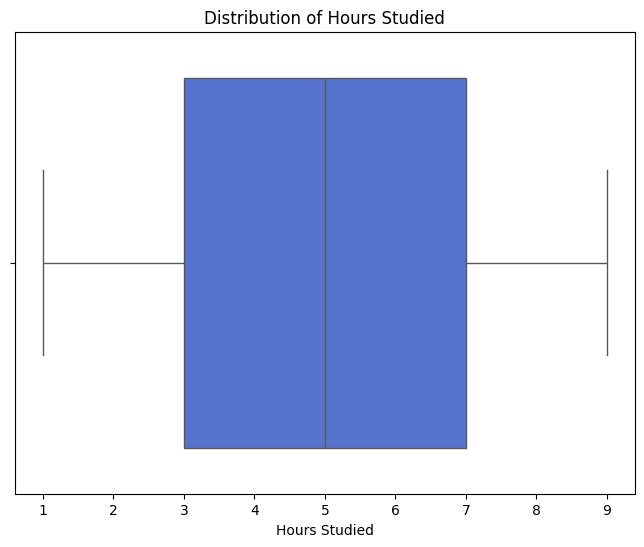

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Hours Studied',data=df,color='royalblue')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.show()

<ipython-input-11-7b3007c6870e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hours Studied'],color='royalblue')


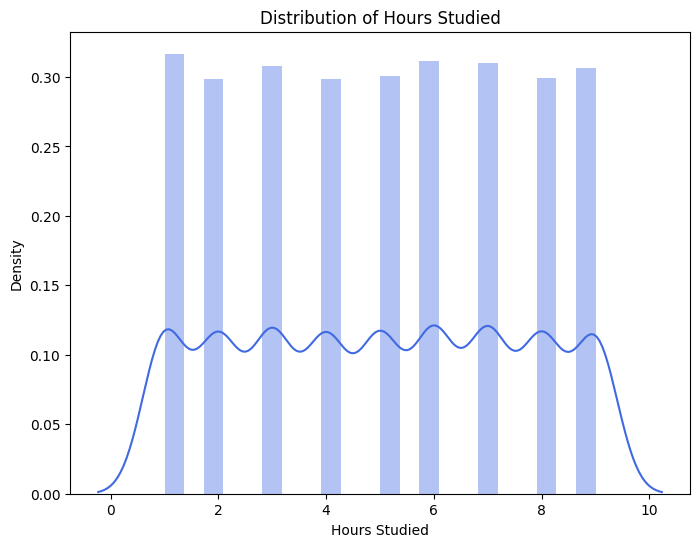

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(df['Hours Studied'],color='royalblue')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.show()

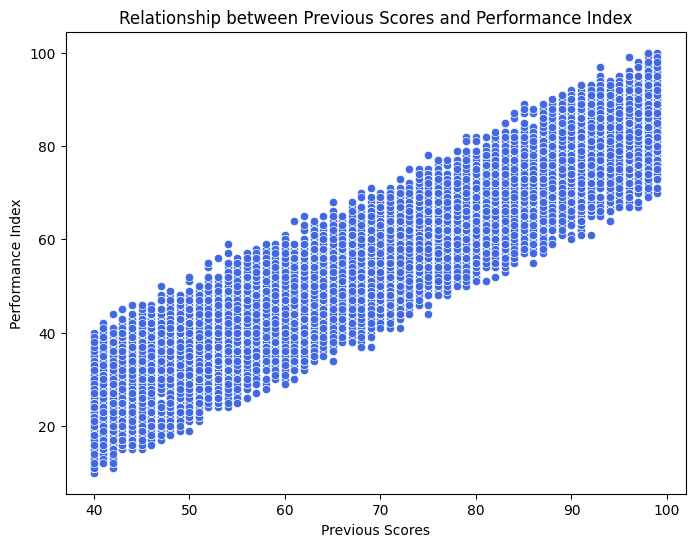

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Previous Scores',y='Performance Index',data=df,color='royalblue')
plt.title('Relationship between Previous Scores and Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

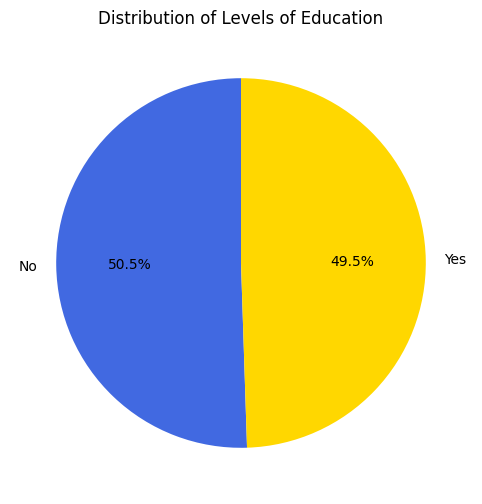

In [16]:
pie_data=df.groupby('Extracurricular Activities')['Performance Index'].count()
plt.figure(figsize=(8,6))
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%',startangle=90,colors=['royalblue','gold','lightcoral'])
plt.title('Distribution of Levels of Education')
plt.show()

In [17]:
df['Extracurricular Activities']=df['Extracurricular Activities' ].map({'Yes':1,'No':0})
df.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2754,4,74,0,7,4,57.0
6810,9,65,0,7,8,65.0
1467,9,61,1,9,9,58.0


In [18]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


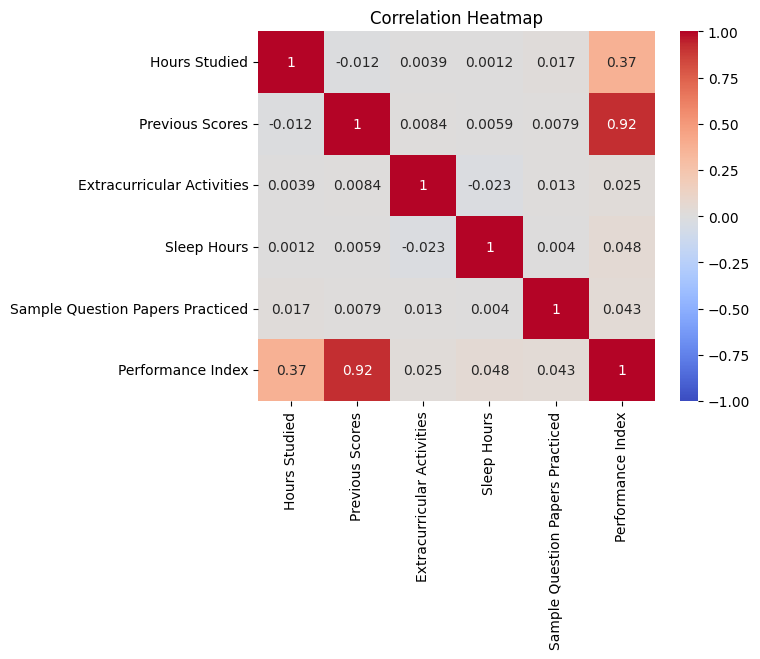

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',center=0,vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
X=df.drop(columns="Performance Index")
y=df["Performance Index"]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (7000, 5)
X_test (3000, 5)
y_train (7000,)
y_test (3000,)


In [25]:
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [26]:
y_test_pred=mlr.predict(X_test)
y_test_pred

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077])

In [27]:
mlr.coef_

array([2.85895223, 1.01551979, 0.58171285, 0.47967676, 0.19039416])

In [28]:
mlr.feature_names_in_

array(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'], dtype=object)

In [29]:
mlr.intercept_

-33.836543807141744

In [30]:
test_data=pd.DataFrame({'Actual':y_test.ravel(),'predicted':y_test_pred.ravel(),"Residual":y_test-y_test_pred,'Dataset':'Testing'})

<ipython-input-30-6cde061f0211>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  test_data=pd.DataFrame({'Actual':y_test.ravel(),'predicted':y_test_pred.ravel(),"Residual":y_test-y_test_pred,'Dataset':'Testing'})


In [33]:
test_data_sample=test_data.sample(15)
test_data_sample

,Actual,predicted,Residual,Dataset
9857,42.0,44.006013,-2.006013,Testing
8722,41.0,40.465842,0.534158,Testing
8423,53.0,50.712545,2.287455,Testing
2420,72.0,74.715380,-2.715380,Testing
8171,74.0,73.527506,0.472494,Testing
1261,33.0,32.636540,0.363460,Testing
7807,40.0,37.843771,2.156229,Testing
9689,32.0,31.278485,0.721515,Testing
3065,57.0,56.454555,0.545445,Testing
7618,58.0,57.462692,0.537308,Testing


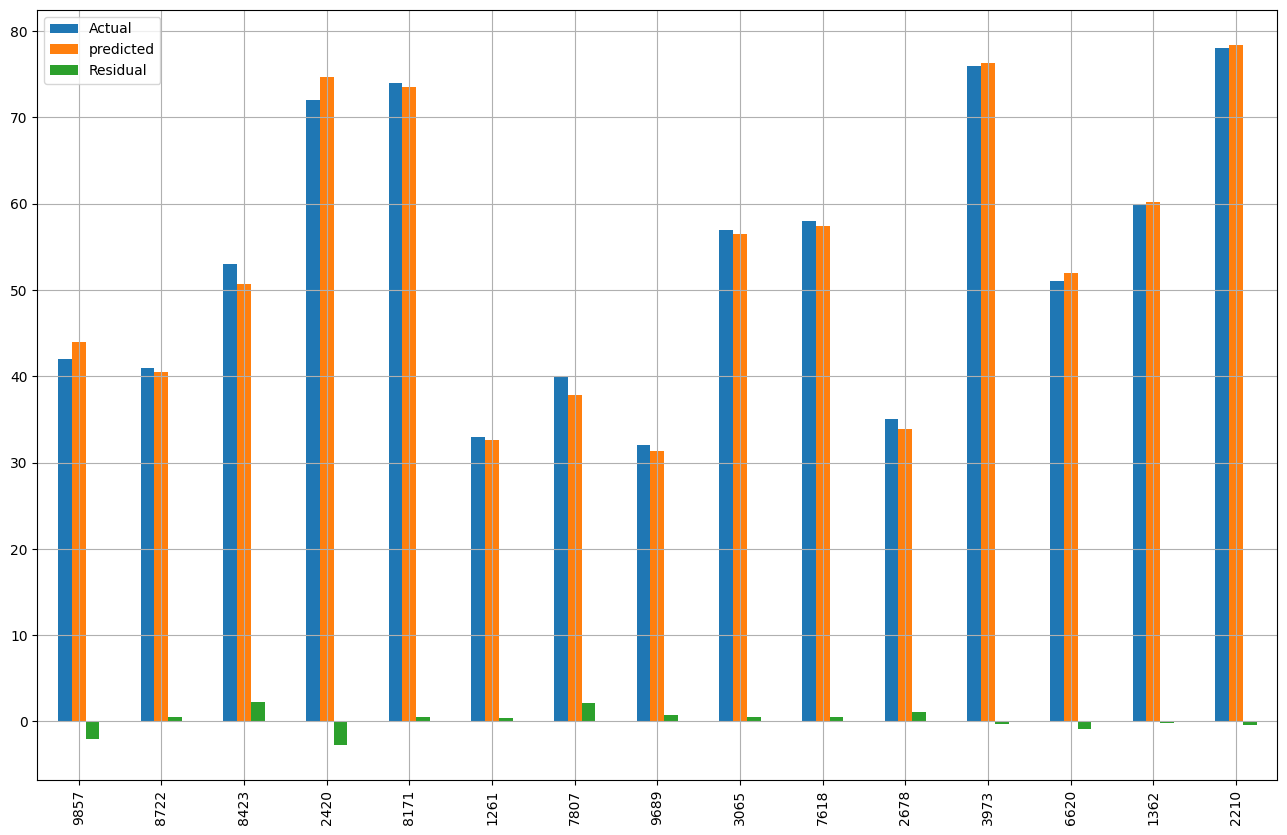

In [34]:
test_data_sample.plot(kind='bar',figsize=(16,10))
plt.grid()
plt.show()

In [35]:
R2_score=r2_score(y_test,y_test_pred)

In [36]:
R2_score

0.9890110607021136

In [37]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")


In [40]:
eval_metric(y_test, y_test_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9890110607021136
MAE 		: 1.6090437564045217
MSE 		: 4.066563824092682
RMSE 		: 2.0165722957763457


In [42]:
y_train_pred = mlr.predict(X_train)
y_train_pred

array([81.78589232, 80.18393722, 49.98815703, ..., 45.13907865,
       21.06892959, 22.61569669])

In [43]:
train_data = pd.DataFrame({'Actual': y_train.ravel(), 'Predicted': y_train_pred.ravel(), "residual":y_train - y_train_pred, 'Dataset': 'Training'})
train_data

<ipython-input-43-8f8deadce69f>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  train_data = pd.DataFrame({'Actual': y_train.ravel(), 'Predicted': y_train_pred.ravel(), "residual":y_train - y_train_pred, 'Dataset': 'Training'})


,Actual,Predicted,residual,Dataset
9069,82.0,81.785892,0.214108,Training
2603,79.0,80.183937,-1.183937,Training
7738,50.0,49.988157,0.011843,Training
1579,81.0,82.496877,-1.496877,Training
5058,52.0,53.491140,-1.491140,Training
...,...,...,...,...
5734,48.0,44.413202,3.586798,Training
5191,51.0,51.542884,-0.542884,Training
5390,44.0,45.139079,-1.139079,Training
860,20.0,21.068930,-1.068930,Training


In [44]:
train_data_saple = train_data.sample(15)

<function matplotlib.pyplot.show(close=None, block=None)>

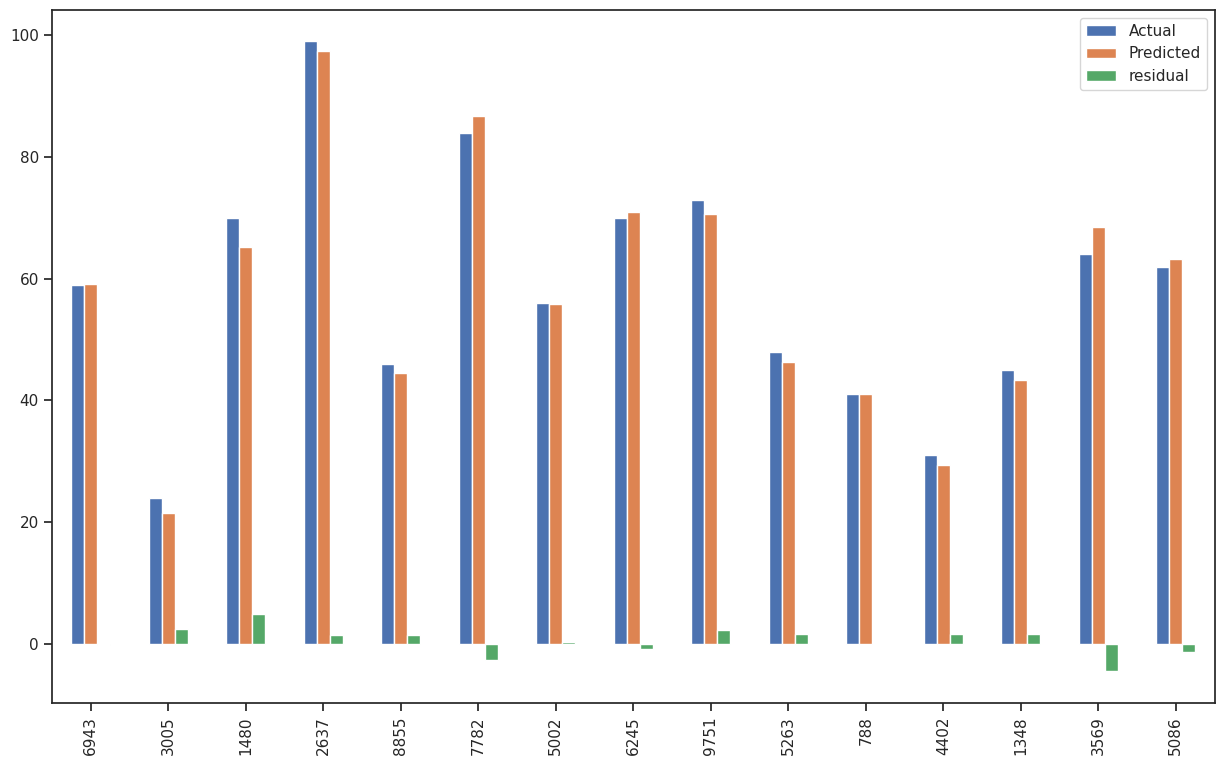

In [45]:
train_data_saple.plot(kind= "bar", figsize = (15,9))
plt.show

In [46]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9886221887978632
MAE 		: 1.6221030273588595
MSE 		: 4.193473712437295
RMSE 		: 2.0477972830427564


In [47]:
combined_data = pd.concat([train_data, test_data], ignore_index=True)

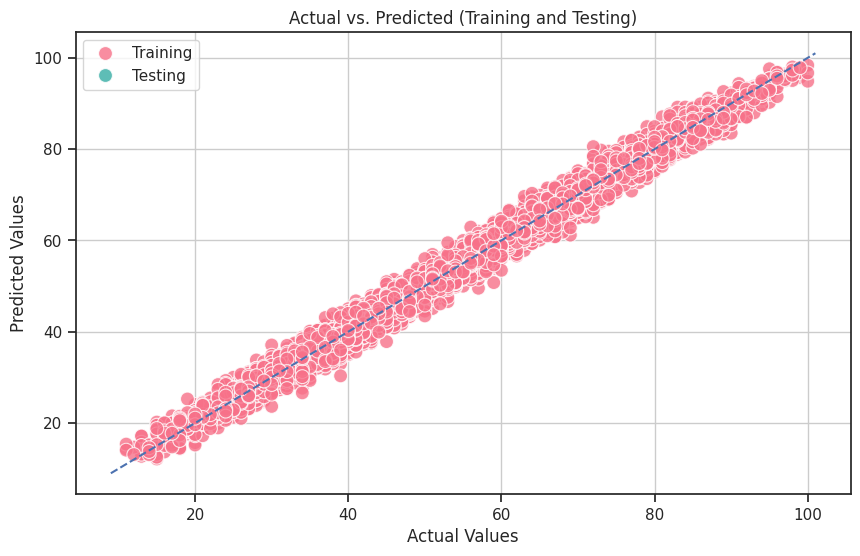

In [48]:
sns.set(style='ticks')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_data, s=100, alpha=0.8, palette='husl')

plt.plot(
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
    'b--'
)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training and Testing)')

plt.legend()
plt.grid(True)
plt.show()

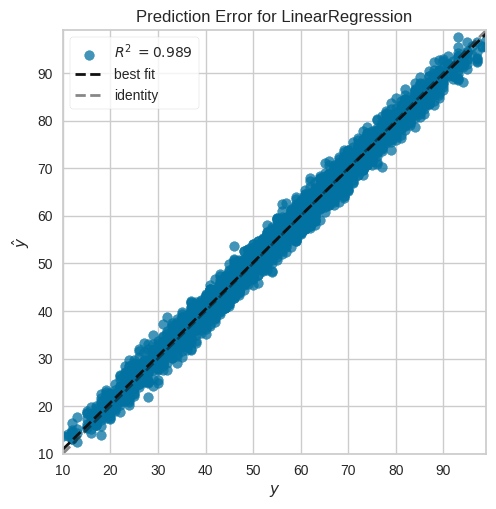

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [49]:
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()